# Question

During campus interviews, company XYZ typically evaluates students based on their test scores from the company's assessment, their % of mark, and interview performance. However, moving forward, the company has decided not to interview all students and instead needs to filter candidates before scheduling interviews.

The company possesses historical data that includes test scores, CGPA, and selection outcomes for previous candidates. This data will be utilized to predict whether a new candidate, with a specific test score and CGPA, will be selected for an interview or not.

Data Set: interviewData.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('interviewData.csv',header=None)
df.columns = ['Exam Mark','test score','Selection']
df.head()

,Exam Mark,test score,Selection
0,34.623660,78.024693,No
1,30.286711,43.894998,No
2,35.847409,72.902198,No
3,60.182599,86.308552,Yes
4,79.032736,75.344376,Yes


## Exploratory data analysis


**Answer the following:**
* What is your target variable?
> The target variable in the above dataset is the "Selection" column (Yes/No) which says whether a candidate is selected or not.
* Do you need to encode the target variable (Yes/No)?
> Yes
* If yes, briefly explain why you need to encode the target variable.

 > The target variable is in textual/catagorical data (Yes/No) we need to convert it into numerical because the ML modeling require numerical feature and target variables.

* Consider the encoding methods: One-hot encoding, Binary encoding, and Label Encoding. Which one do you apply in this case?

 >We can use Label encoding

* Explain why you have selected the above encoding method.
> In the above dataset we have the target variable
  with only two categories-yes/no- so label encoding is the most appropriate encoding ethod for doing this ML model. It converts the categorical values to binary numerical values, it maps "Yes" to 1 and "No" to 0


Read the following article

https://medium.com/@swayampatil7918/exploring-different-encoding-techniques-for-machine-learning-models-b762e3b546db

In [4]:
# Create a new dataset by apply the encoding  method selected above on the dataset
# Read this to implement this part
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Select the appropriate encode
lab_en= LabelEncoder()

# Transform the target variable
df['Selection'] = lab_en.fit_transform(df['Selection'])

display(df)

,Exam Mark,test score,Selection
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


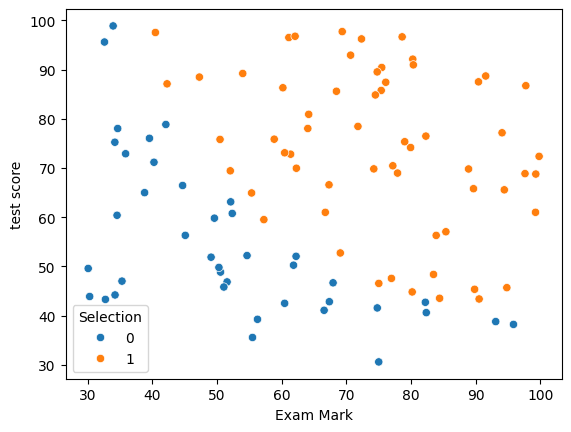

In [5]:
# Wrie a code to visualize your data
# See https://seaborn.pydata.org/generated/seaborn.scatterplot.html

import seaborn as sns

# sns.________(____,x = ____,y=___,hue =____)
sns.scatterplot(df,x = 'Exam Mark',y='test score',hue ='Selection')

#display scatter plot
plt.show()

## Logistic Regression Model

logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ \hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$

  where

  $$g(z) = \frac{1}{1+e^{-z}}$$

That is
$$\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \frac{1}{1+e^{-(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )}}$$

In [6]:
# Write a function 'predict' to compute the logistic Regression model

def Sigmoid(z):
  return 1/(1+np.exp(-z))

def predict(w,b,x):
  z=np.dot(w,x)+b
  return Sigmoid(z)

### Answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * Since it is a binary classification problem, MSE is not a good method, it is used in regression problems, where the goal is to predict a continuous output. Here we need to predict the class it belongs.

### Log Loss/ Sigmoid Cross Entropy for Logistic regression

     


$$ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(\hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - \hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$

### Cost function


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

### Answer the following


* What is a loss function?
> The loss function also referred as the error function that quantifies the error margin between the predicted outputs from an ML algorithm and the actual target values.
* What is a cost function?
> The cost function is the technique of evaluating “the performance of our algorithm/model”. It takes both predicted outputs by the model and actual outputs and calculates how much wrong the model was in its prediction.
* What is the distinction between them?


>*   Loss function: It measure error margin between the predicted ouput and the actual target for a single record.It measures how well the model's prediction for a single instance matches the true value.
  
>*  Cost function: It refers to the average error over the entire training set. It aggregates the loss over all training examples to give a single measure of the model's performance.



### Derivative of the cost function with respect to weights

Type here the formulas to compute the derivatives of the const function with respect to $w_1$, $w_2$ and b

In [14]:
# write a function to estimate the derivatives of the cost function
def compute_cost(w, b, x, y):

    a = len(y)
    predictions = predict(w, b, x)
    cost = -1/a * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost


def compute_gradient_wb(w, b, x, y):

    a = len(y)
    predictions = predict(w, b, x)
    dz = predictions - y
    dw = 1/a * np.dot(x.T, dz)
    db = 1/a * np.sum(dz)
    return dw, db

### Gradient Descent Algorithm

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [15]:
# Write a function to perform the gradient decent

def gradient_descent(w,b,X_train,X_test,y_train,y_test,alpha,num_iter):

    train_costs = []
    test_costs = []
    for i in range(num_iter):
        # Compute gradients
        dw, db = compute_gradient_wb(w, b, X_train, y_train)

        # Update weights and bias
        w -= alpha * dw
        b -= alpha * db

        # Compute training and testing costs and append to lists
        train_cost = compute_cost(w, b, X_train, y_train)
        test_cost = compute_cost(w, b, X_test, y_test)
        train_costs.append(train_cost)
        test_costs.append(test_cost)

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Training Cost = {train_cost}, Testing Cost = {test_cost}")

    return w, b, train_costs, test_costs

## Model Training

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the predict function
def predict(w, b, x):
    z = np.dot(x, w) + b
    return sigmoid(z)

# Gradient descent function
def gradient_descent(w, b, X_train, X_test, y_train, y_test, alpha, num_iter):
    train_costs = []
    test_costs = []

    for i in range(num_iter):
        # Forward pass
        y_train_pred = predict(w, b, X_train)
        y_test_pred = predict(w, b, X_test)

        # Compute costs
        train_cost = -np.mean(y_train * np.log(y_train_pred) + (1 - y_train) * np.log(1 - y_train_pred))
        test_cost = -np.mean(y_test * np.log(y_test_pred) + (1 - y_test) * np.log(1 - y_test_pred))

        # Compute gradients
        dw = np.dot(X_train.T, (y_train_pred - y_train)) / len(X_train)
        db = np.mean(y_train_pred - y_train)

        # Update parameters
        w -= alpha * dw
        b -= alpha * db

        # Record costs
        train_costs.append(train_cost)
        test_costs.append(test_cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Training Cost = {train_cost}, Test Cost = {test_cost}")

    return w, b, train_costs, test_costs

# Load the data from DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and bias
np.random.seed(1)
w_ini = np.random.rand(X_train.shape[1])
b_ini = -9

# Set learning rate and number of iterations
alpha = 0.001
num_iter = 1000

# Run gradient descent
w_opt, b_opt, train_costs, test_costs = gradient_descent(w_ini, b_ini, X_train, X_test, y_train, y_test, alpha, num_iter)

# Print final parameters
print(f"Final parameters: w = {w_opt}, b = {b_opt}")


Iteration 0: Training Cost = nan, Test Cost = nan
Iteration 100: Training Cost = 0.2743617964482197, Test Cost = 0.3469066905857375
Iteration 200: Training Cost = 0.27418379578036517, Test Cost = 0.35183864743876947
Iteration 300: Training Cost = 0.27415333994782654, Test Cost = 0.35182748577036
Iteration 400: Training Cost = 0.27412290130752287, Test Cost = 0.3518110281302119
Iteration 500: Training Cost = 0.2740924796819959, Test Cost = 0.3517945776890517
Iteration 600: Training Cost = 0.27406207505654, Test Cost = 0.3517781400261887
Iteration 700: Training Cost = 0.2740316874164673, Test Cost = 0.35176171513521487
Iteration 800: Training Cost = 0.2740013167471063, Test Cost = 0.3517453030038449
Iteration 900: Training Cost = 0.2739709630338031, Test Cost = 0.3517289036198029
Final parameters: w = [0.08239114 0.06566054], b = -9.026491511598241


<ipython-input-21-72b2ddfeb6f1>:24: RuntimeWarning: divide by zero encountered in log
  train_cost = -np.mean(y_train * np.log(y_train_pred) + (1 - y_train) * np.log(1 - y_train_pred))
<ipython-input-21-72b2ddfeb6f1>:24: RuntimeWarning: invalid value encountered in multiply
  train_cost = -np.mean(y_train * np.log(y_train_pred) + (1 - y_train) * np.log(1 - y_train_pred))
<ipython-input-21-72b2ddfeb6f1>:25: RuntimeWarning: divide by zero encountered in log
  test_cost = -np.mean(y_test * np.log(y_test_pred) + (1 - y_test) * np.log(1 - y_test_pred))
<ipython-input-21-72b2ddfeb6f1>:25: RuntimeWarning: invalid value encountered in multiply
  test_cost = -np.mean(y_test * np.log(y_test_pred) + (1 - y_test) * np.log(1 - y_test_pred))


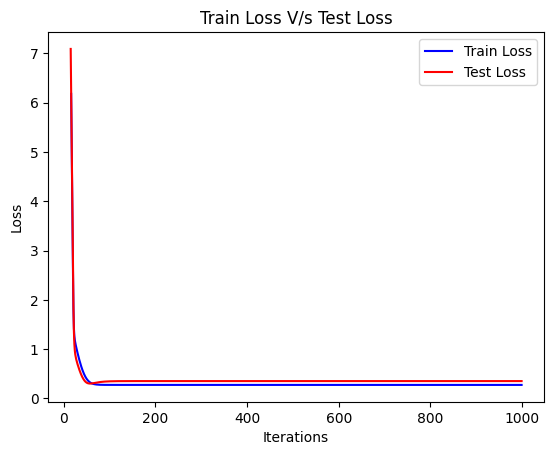

In [24]:
# Plot the train and test loss in one plot
import matplotlib.pyplot as plt

# Plot the train and test loss with different colors
plt.plot(range(num_iter), train_costs, label='Train Loss', color='blue')
plt.plot(range(num_iter), test_costs, label='Test Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Train Loss V/s Test Loss')
plt.legend()
plt.show()


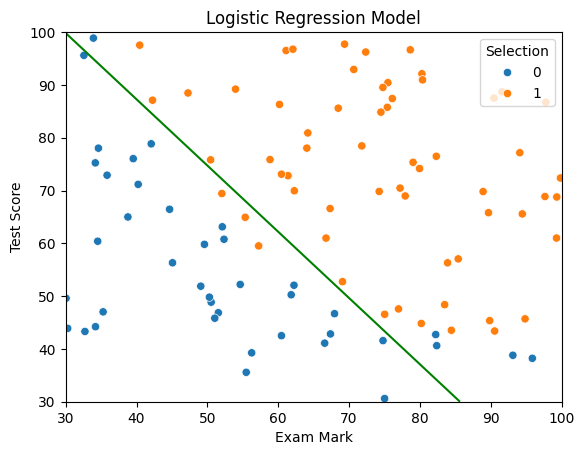

In [28]:
#  plot the Logistic Regression Model for the estimated w and b values
import matplotlib.pyplot as plt
import seaborn as sns
P = 0.5 # the boundary seperation value (probability)

# Generate sample points in the domain 30 to 100
u = np.linspace(30, 100, 50)
v = np.linspace(30, 100, 50)

# making it into 2D mesh
X, Y = np.meshgrid(u, v)
logReg = np.zeros((len(u), len(v)))

# Predict the result of the (u,v) pair data with the estimated w and b values
for i in range(len(u)):
    for j in range(len(v)):
      zz = X[i,j]*w_opt[0]+Y[i,j]*w_opt[1]+b_opt
      logReg[i,j] = 1/(1+np.exp(-zz))


plt.contour(u,v,logReg, levels = [P], colors="g" )

# to see the full function plot in the domain
# plt.contourf(u,v,logReg)

# Plot the real data
sns.scatterplot(df,x = 'Exam Mark',y='test score',hue ='Selection')
plt.xlabel('Exam Mark')
plt.ylabel('Test Score')
plt.title('Logistic Regression Model')
plt.legend(title='Selection', loc='upper right')
plt.show()

### Answer the following


* What does the P value signify in the provided code?
> The P value represents the probability of a student passing the interview based on their exam and test scores. it varies in between 0 and 1
* How will altering the P value affect the outcome?
> Modifying the decision threshold, represented by the P value, influences the model's sensitivity and specificity in binary classification. Elevating the P value makes the model more conservative, diminishing positive predictions but enhancing specificity. Conversely, lowering the P value renders the model more liberal, increasing positive predictions while improving sensitivity.
* What range of values can P encompass?
> The P value, representing the probability of an event occurring, can range between 0 and 1. In binary classification, it typically serves as the decision threshold, determining the classification outcome based on whether the predicted probability exceeds this threshold.


* Describe the importance of the P value in a project aimed at classifying tumors as malignant or benign.
> It determines the trade-off between correctly identifying malignant tumors (sensitivity) and correctly identifying benign tumors (specificity). Adjusting the P value allows for fine-tuning the classification model to prioritize either minimizing false negatives (missing malignant tumors) or minimizing false positives (incorrectly classifying benign tumors as malignant)

### Imagine a scenario where a student scores 65 marks in both the Exam and Test. Use your model to predict whether the student will pass the interview or not.

In [32]:
exam_score = 65
test_score = 65

# Predicting the probability of passing the interview
student_scores = np.array([[exam_score, test_score]])
pass_probability = predict(w_opt, b_opt, student_scores)

# Convert the probability to a class label
pass_label = 'Yes' if pass_probability >= 0.5 else 'No'

print(f"The probability of passing the interview: {pass_probability[0]}")
print(f"The student will {'pass' if pass_label == 'Yes' else 'not pass'} the interview.")

The probability of passing the interview: 0.6449393168275962
The student will pass the interview.
